In [1]:
!pip install klib
import klib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 6.7 MB/s 
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline
import gc

import platform

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')
rc('axes', unicode_minus=False)

Unknown system...


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
loan = pd.read_csv('/content/gdrive/MyDrive/빅콘_2022/loan_result.csv')
log = pd.read_csv('/content/gdrive/MyDrive/빅콘_2022/log_data.csv')
user = pd.read_csv('/content/gdrive/MyDrive/빅콘_2022/user_spec.csv')

### EDA

In [5]:
log

,user_id,event,timestamp,mp_os,mp_app_version,date_cd
0,576409,StartLoanApply,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
1,576409,ViewLoanApplyIntro,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
2,72878,EndLoanApply,2022-03-25 11:14:44,Android,3.8.4,2022-03-25
3,645317,OpenApp,2022-03-25 11:15:09,iOS,3.6.1,2022-03-25
4,645317,UseLoanManage,2022-03-25 11:15:11,iOS,3.6.1,2022-03-25
...,...,...,...,...,...,...
17843988,242442,StartLoanApply,2022-05-27 16:08:21,Android,3.13.0,2022-05-27
17843989,242442,EndLoanApply,2022-05-27 16:08:21,Android,3.13.0,2022-05-27
17843990,593062,OpenApp,2022-05-27 16:19:10,Android,3.13.0,2022-05-27
17843991,593062,Login,2022-05-27 16:19:15,Android,3.13.0,2022-05-27


In [6]:
loan.is_applied.value_counts()

[3, 4, 5]

### DF 살펴보기


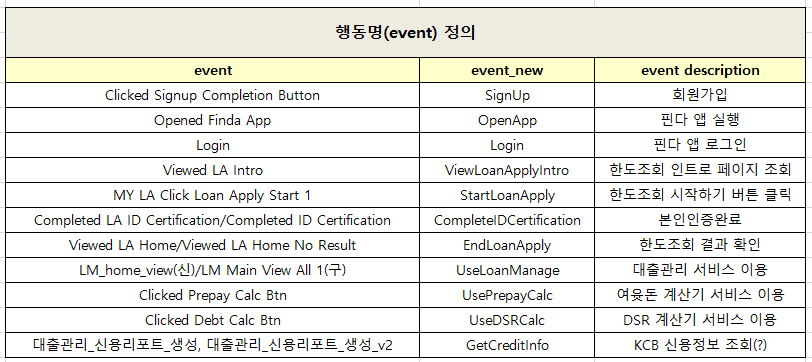

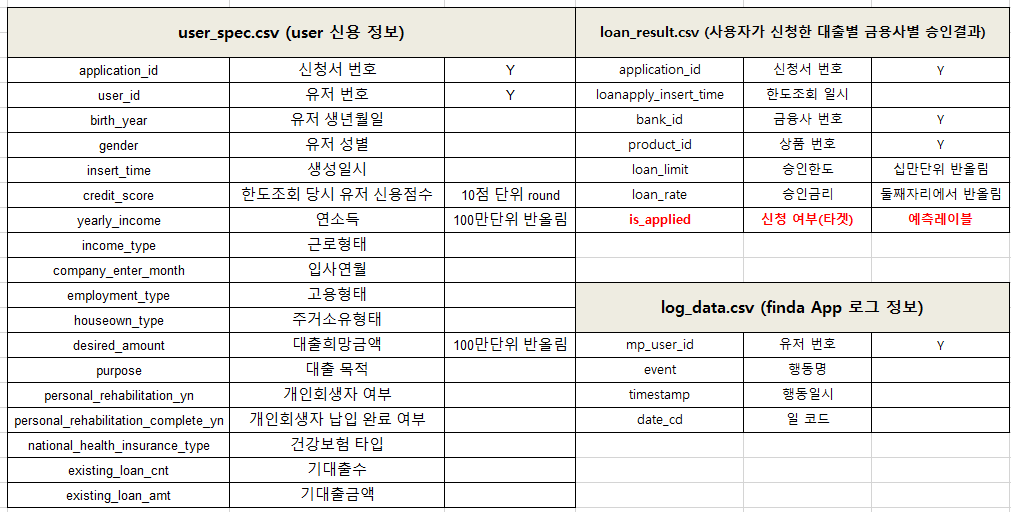

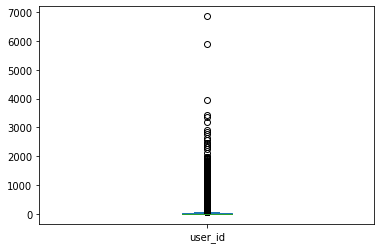

In [7]:
log.groupby('user_id')['user_id'].count().plot.box()

## 방향성
- loan_result 의 결과값을 받은 신청서 ID 의 특징 살피기
- 각 신청서의 유형 별 어떤 은행의 어떤 상품을 신청했는지 파악하기

### User 의 입장
- 신청서의 feature를 만든 후 특정 유저가 만든 신청서의 유형을 취합
- 

In [8]:
user.application_id

0          1249046
1           954900
2           137274
3          1570936
4           967833
            ...   
1394211    1864587
1394212    1327066
1394213    1319606
1394214    1482466
1394215     816537
Name: application_id, Length: 1394216, dtype: int64

In [9]:
#id_in_loan = user.application_id.apply(lambda x : 1 if x in b  else 0)
#with open('id_in_loan.npy', 'wb') as f:
#  np.save(f,id_in_loan)
id_in_loan = np.load('/content/gdrive/MyDrive/빅콘_2022/id_in_loan.npy')

In [10]:
id_in_loan = pd.Series(id_in_loan)

In [11]:
id_in_loan = id_in_loan.rename('id_in_loan')

In [12]:
user = pd.concat([user,id_in_loan],axis=1)

In [13]:
user.columns

Index(['application_id', 'user_id', 'birth_year', 'gender', 'insert_time',
       'credit_score', 'yearly_income', 'income_type', 'company_enter_month',
       'employment_type', 'houseown_type', 'desired_amount', 'purpose',
       'personal_rehabilitation_yn', 'personal_rehabilitation_complete_yn',
       'existing_loan_cnt', 'existing_loan_amt', 'id_in_loan'],
      dtype='object')

In [14]:
# 기대출 금액, 신용점수 등의 차이가 있음
user.groupby('id_in_loan')['existing_loan_amt'].mean()

id_in_loan
0    5.821981e+07
1    7.641749e+07
Name: existing_loan_amt, dtype: float64

In [15]:
user.groupby('user_id')['id_in_loan']

In [16]:
user # 우리는 고객 특징을 log 에서만 뽑아야 하는가? 만약 이 사람의 초기 행동이 이럴 때 어떤 유형의 사람으로 번졌는지 어떻게 알 수 있는가?
log

,user_id,event,timestamp,mp_os,mp_app_version,date_cd
0,576409,StartLoanApply,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
1,576409,ViewLoanApplyIntro,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
2,72878,EndLoanApply,2022-03-25 11:14:44,Android,3.8.4,2022-03-25
3,645317,OpenApp,2022-03-25 11:15:09,iOS,3.6.1,2022-03-25
4,645317,UseLoanManage,2022-03-25 11:15:11,iOS,3.6.1,2022-03-25
...,...,...,...,...,...,...
17843988,242442,StartLoanApply,2022-05-27 16:08:21,Android,3.13.0,2022-05-27
17843989,242442,EndLoanApply,2022-05-27 16:08:21,Android,3.13.0,2022-05-27
17843990,593062,OpenApp,2022-05-27 16:19:10,Android,3.13.0,2022-05-27
17843991,593062,Login,2022-05-27 16:19:15,Android,3.13.0,2022-05-27


# 생각할 수 있는 유형
- 첫 신청서 작성 시 작성 후 대출상품 조회를 해보지 않았으며 이후에도 대출 상품 조회를 하지 않은 고객
  - 이후에도 지속적인 신청서 작성을 행한 고객
    - 신청서 내용의 변동이 있는 고객
    - 신청서 내용의 변동이 없는 고객
  - 이후에 신청서 작성을 하지 않은 고객
- 첫 신청서 작성 시 작성 후 대출상품 조회를 해보지 않았으나 이후에 대출 상품 조회를 한 고객 
  - 대출 상품 조회만 한 고객
    - 대출 상품 조회 후 신청서 작성 변동이 있는 고객
    - 동일한 구성의 신청서를 가지고 대출 상품 조회를 행한 고객
  - 대출 상품 조회 후 신청까지 한 고객
    - 바로 신청
- 첫 신청서 작성 후 대출 상품 조회를 수행한 고객
  - 대출 상품 조회 후 바로 대출 신청을 한 고객
  - 조회만 마친 고객
    - 이후 신청서 수정 후 다시 조회를 해보지만 신청은 안한 고객
    - 신청서 수정 후 대출 신청을 행한 고객

## 처음 application_id 시도 시 대출 상품 조회까지 가본사람 정의

In [17]:
first_apply = user.sort_values(by = 'insert_time').drop_duplicates('user_id')

In [18]:
first_apply.head(3)

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,id_in_loan
543548,566528,681184,1974.0,1.0,2022-03-01 00:11:35,580.0,8000000.0,OTHERINCOME,NaN,기타,전월세,1000000.0,생활비,NaN,NaN,4.0,20000000.0,1
736347,180433,623737,1997.0,1.0,2022-03-01 00:12:05,740.0,12000000.0,FREELANCER,202202.0,일용직,기타가족소유,3000000.0,생활비,NaN,NaN,3.0,11000000.0,1
635154,1657888,752985,1997.0,1.0,2022-03-01 00:12:06,580.0,12000000.0,FREELANCER,202102.0,기타,기타가족소유,3000000.0,생활비,NaN,NaN,7.0,33000000.0,1


In [19]:
print(user.shape)
user.id_in_loan.sum()

(1394216, 18)


968753

In [20]:
print(first_apply.shape)
first_apply.id_in_loan.sum()

(405213, 18)


298552

In [21]:
first_apply_user = first_apply.query('id_in_loan == 1').user_id.unique()

In [22]:
not_first_user = user.query('user_id not in @first_apply_user')
first_user = user.query('user_id in @first_apply_user')

In [23]:
not_first_but_apply = not_first_user.query('id_in_loan == 1').user_id.unique() 

In [115]:
len(user.query('user_id not in @first_apply_user')),len(user.query('user_id in @first_apply_user'))

(354907, 1039309)

In [116]:
val1 = user.query('user_id not in @first_apply_user').id_in_loan.sum()/user.query('user_id not in @first_apply_user').shape[0]
# 처음 대출 신청 조회를 하지 않은 사람 중 대출 조회를 한 사람

In [117]:
val2 = user.query('user_id in @first_apply_user').id_in_loan.sum()/user.query('user_id in @first_apply_user').shape[0]
# 처음 대출 신청 조회를 한 사람들의 총 데이터 중 대출 신청 조회를 한 사람

In [124]:
val1,val2

(0.2070063425066285, 0.8614233110653329)

In [26]:
first_user_id = first_user.user_id.unique()

In [27]:
# 처음 조회를 한 사람 중 이후 조회를 안한 사람
first_apply_but_not = first_user.query('user_id in @first_user_id').groupby('user_id')['id_in_loan']\
.sum().reset_index().query('id_in_loan == 1').user_id.unique()
# 처음 조회를 한 사람 중 이후 조회를 한 사람
first_apply_and_apply = first_user.query('user_id in @first_user_id').groupby('user_id')['id_in_loan']\
.sum().reset_index().query('id_in_loan != 1').user_id.unique()

In [28]:
# 처음 조회한 사람 중 이후 조회를 또 한 사람
user.query('user_id in @first_apply_and_apply').groupby('user_id')['id_in_loan'].sum()

user_id
11        4
17        2
20        6
24        2
27        5
         ..
879689    3
879691    5
879692    5
879693    5
879696    2
Name: id_in_loan, Length: 154241, dtype: int64

In [29]:
len(first_apply_but_not),len(first_apply_and_apply )

(144311, 154241)

In [30]:
# 처음 신청하지 않은 사람 중 이후 대출 조회를 한 사람의 대출 조회 수 
not_first_user.query('user_id in @not_first_but_apply').groupby('user_id')['id_in_loan'].sum()

user_id
25         1
45         3
236        4
267       21
448        1
          ..
879519     1
879525     3
879587     7
879588     2
879617     4
Name: id_in_loan, Length: 18915, dtype: int64

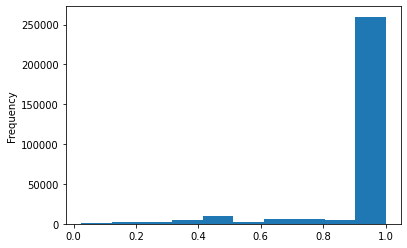

In [31]:
## 처음 신청한 사람들의 신청서 전환율
(user.query('user_id in @first_apply_user').groupby('user_id')['id_in_loan'].sum()\
/user.query('user_id in @first_apply_user').groupby('user_id')['user_id'].count()).plot.hist()

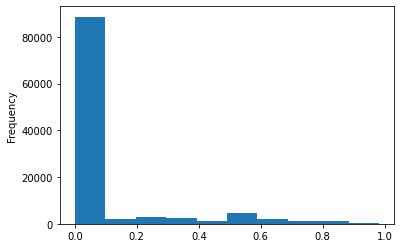

In [32]:
# 처음 신청하지 않은 사람들에 대한 신청서 전환율 max = 0.98
(user.query('user_id not in @first_apply_user').groupby('user_id')['id_in_loan'].sum()\
/user.query('user_id not in @first_apply_user').groupby('user_id')['user_id'].count()).plot.hist()

## 각 고객의 신청서 변동성

In [33]:
first_user_copy = first_user.iloc[5:-1].copy()
first_col = first_user.iloc[5:-2].columns

In [34]:
first_col_dict = dict()
for i in first_col:
  first_col_dict[i] = first_user_copy.groupby('user_id')[i].nunique()

In [35]:
first_col_dict.keys()

dict_keys(['application_id', 'user_id', 'birth_year', 'gender', 'insert_time', 'credit_score', 'yearly_income', 'income_type', 'company_enter_month', 'employment_type', 'houseown_type', 'desired_amount', 'purpose', 'personal_rehabilitation_yn', 'personal_rehabilitation_complete_yn', 'existing_loan_cnt', 'existing_loan_amt', 'id_in_loan'])

In [36]:
first_user_c = pd.DataFrame(first_col_dict)
first_user_c = first_user_c.drop(columns = 'user_id').reset_index()

In [42]:
# 처음 신청을 진행했던 use의 전체 table의 변동성


In [51]:
first_user_c['sum'] = first_user_c.iloc[:,1:-1].sum(axis=1)

In [53]:
user = user.merge(first_user_c[['user_id','sum']],on = 'user_id',how = 'left')

In [60]:
user['sum'].isna().sum()

354908

In [63]:
not_first_user
not_first_col = not_first_user.iloc[5:-2].columns

In [65]:
not_first_col_dict = dict()
for i in first_col:
  not_first_col_dict[i] = not_first_user.groupby('user_id')[i].nunique()

In [66]:
not_first_user_c = pd.DataFrame(not_first_col_dict)
not_first_user_c = not_first_user_c.drop(columns = 'user_id').reset_index()

In [79]:
not_first_user_c['sum1'] = not_first_user_c.iloc[:,1:-1].sum(axis=1)

In [81]:
user = user.merge(not_first_user_c[['user_id','sum1']],on = 'user_id',how = 'left')

In [84]:
user['변동성'] = user[['sum','sum1']].max(axis=1)

In [91]:
a = [10,user['변동성'].describe()[4],user['변동성'].describe()[5],user['변동성'].describe()[6]]

In [93]:
def dif(x):
  if x > a[-1]:
    return 4
  elif x> a[-2]:
    return 3
  elif x > a[1]:
    return 2
  elif x > a[0]:
    return 1

In [94]:
user['변동성지표'] = user['변동성'].apply(lambda x : dif(x))

In [100]:
user.groupby('변동성지표')['id_in_loan'].mean()

변동성지표
1.0    0.726831
2.0    0.727376
3.0    0.692460
4.0    0.630699
Name: id_in_loan, dtype: float64

In [102]:
loan = loan.merge(user[['application_id','변동성지표']],on = 'application_id', how = 'inner')

In [109]:
import seaborn as sns

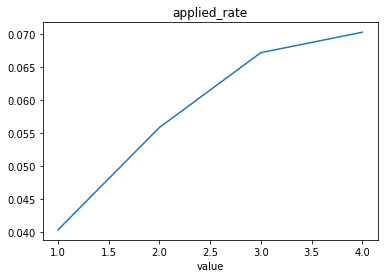

In [112]:
loan.groupby('변동성지표')['is_applied'].mean().plot()
plt.title('applied_rate')
plt.xlabel('value')
plt.show()